In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/Bank Customer Churn Prediction.csv')

**IQR Method**( **Inter Quartile Range**)

In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Firstly we should decide on which column we can apply the IQR method.

**IQR methods are only applicable to the numerical comumns**


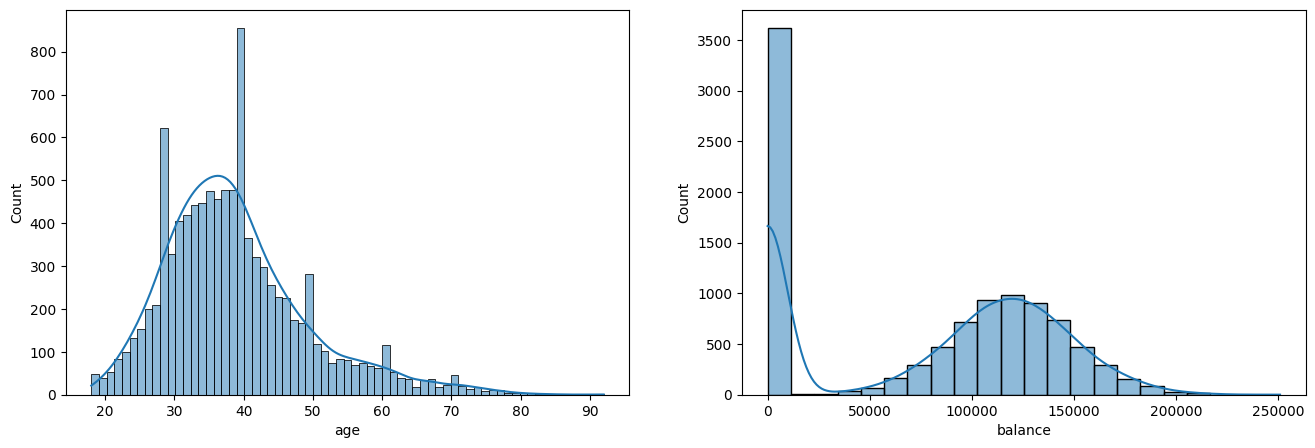

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data['age'], kde=True)

plt.subplot(1,2,2)
sns.histplot(data['balance'], kde=True)

plt.show()

From the above graph, we can see that the age column is right (positive) skewed, so now, from here we will do our outlier detection and analysis on this column only.

In [ ]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Here, we are using describe function on top of the selected feature, which stimulates some insights as follows:

1)25th percentile is 32, 50th percentile (median) is 37 and 75th percentile is 44.

2)The standard deviation is 10.48, the minimum value is 18, and the max is 92.

<Axes: >

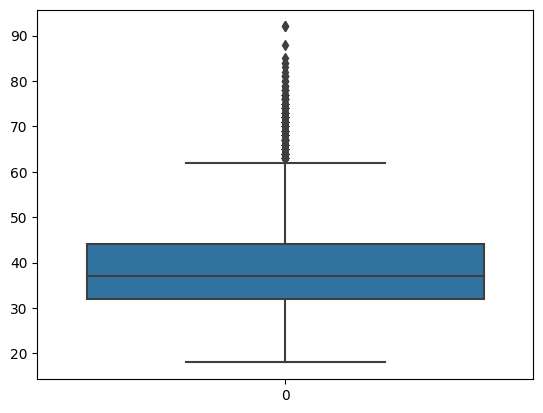

In [ ]:
sns.boxplot(data = data['age'])

We used the boxplot to check whether we have outliers in the column that have skewed distribution so that we can remove/deal with them using IQR general method.

**Finding the IQR**


In [ ]:
percentile25 = data['age'].quantile(0.25)
percentile75 = data['age'].quantile(0.75)

So IQR = (75th quartile/percentile – 25th quartile/percentile).

Hence from the above two lines of code, we are first calculating the 75th and 25th quartile using the predefined quantile function.

In [ ]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  44.0
25th quartile:  32.0


So we got the 75th quartile as 44, i.e. one with age 44 is just behind 25% of customers in bank.

similarly, for the 25th quartile, we have 32  i.e. the one with age 32 is ahead of just 25% of customers.

In [ ]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  12.0


 For calculating IQR, we need the 75th percentile and 25th percentile, where IQR is the difference between the 75th and 25th Quartile.
 For calculating the upper and lower limit, we need to have the IQR as well, as it is part of the formulae. The value we got is 12.

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 62.0
lower_limit: 14.0


**Finding SKEWNESS**

In [ ]:
# Calculate skewness
skewness = data['age'].skew()

# Print results with descriptive labels
print(f"Skewness of {'age'}: {skewness:.2f}")

Skewness of age: 1.01


**Skewness:**

Positive values indicate right-skewed distributions (tail on the right).

Negative values indicate left-skewed distributions (tail on the left).

Values close to 0 suggest an approximately symmetric distribution.

**So our 'age' column graph is right-skewed distributions**

**Finding KURTOSIS**

In [ ]:
# Calculate kurtosis
kurtosis = data['age'].kurt()

# Print results with descriptive labels
print(f"Kurtosis of {'age'}: {kurtosis:.2f}")

Kurtosis of age: 1.40


Kurtosis:

Positive values indicate a more peaked distribution with heavier tails than a normal distribution (leptokurtic).

Negative values indicate a flatter distribution with lighter tails than a normal distribution (platykurtic).

Values close to 0 suggest a distribution similar to a normal distribution in terms of peakedness.

**So our 'age' column is a more peaked distribution with heavier tails than a normal distribution (leptokurtic).**

**Trimming**

This is the way we can remove outliers in correct meaning as we don’t give them other certain values or treat them in another way. Trimming removes all the bad data from the dataset just to ensure the quantity of data is not much.

In [ ]:
new_data = data[data['age'] < upper_limit]
new_data.shape

(9589, 12)

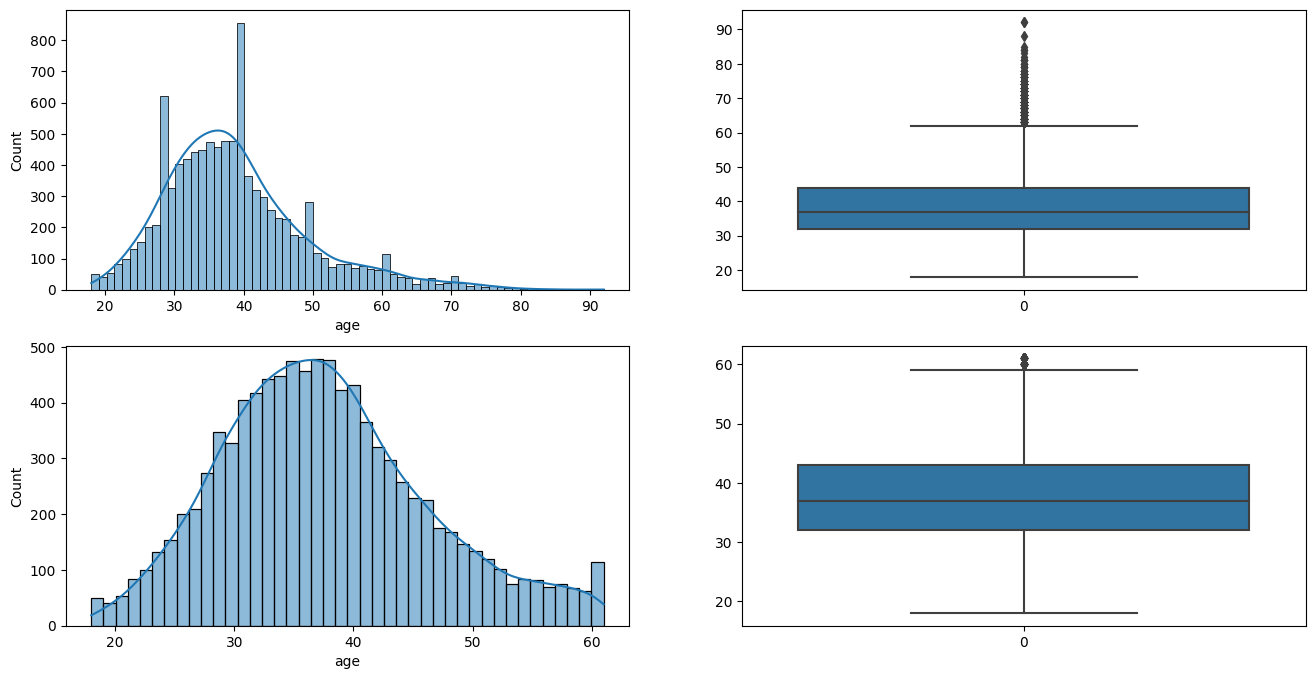

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['age'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['age'])

plt.subplot(2,2,3)
sns.histplot(new_data['age'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data['age'])

plt.show()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Function to identify outliers using IQR method
def identify_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

# Loop through numerical columns and identify outliers
for column in numerical_columns:
    outliers = identify_outliers_iqr(data[column])

    # Print information if there are outliers in the column
    if outliers.any():
        print(f"Outliers in {column} column:")
        print(data[outliers][column])
        print("\n")


Outliers in credit_score column:
7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: credit_score, dtype: int64


Outliers in age column:
58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: age, Length: 359, dtype: int64


Outliers in products_number column:
7       4
70      4
1254    4
1469    4
1488    4
1701    4
1876    4
2124    4
2196    4
2285    4
2462    4
2499    4
2509    4
2541    4
2614    4
2617    4
2872    4
3152    4
3365    4
3841    4
4013    4
4014    4
4166    4
4260    4
4403    4
4511    4
4516    4
4606    4
4654    4
4748    4
4822    4
5010    4
5137    4
5235    4
5386    4
5700    4
5904    4
6150    4
6172    4
6279    4
6750    4
6875    4
7257    4
7457    4
7567    4
7698    4
7724    4
7729    4
8041    4
8590    4
8683    4
8850    4
8923    4
92

From the above information,we can say that there is moreoutliers in the products_number so let us remove that outliers using IQR method.

In [ ]:
data['products_number'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products_number, dtype: float64

Here, we are using describe function on top of the selected feature, which stimulates some insights as follows:

1)25th percentile is 1, 50th percentile (median) is 1 and 75th percentile is 2.

2)The standard deviation is 0.58, the minimum value is 11, and the max is 4.

<Axes: >

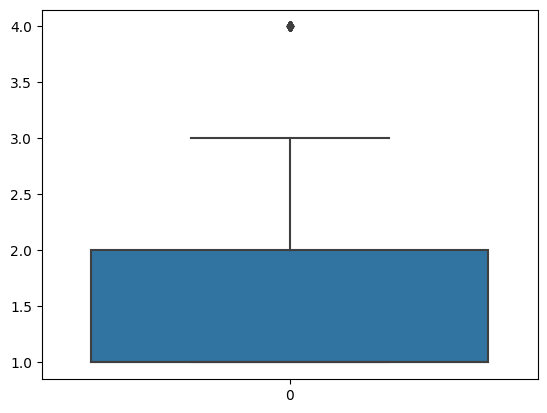

In [ ]:
sns.boxplot(data = data['products_number'])

We used the boxplot to check whether we have outliers in the column that have skewed distribution so that we can remove/deal with them using IQR general method.

In [ ]:
percentile25 = data['products_number'].quantile(0.25)
percentile75 = data['products_number'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

75th quartile:  2.0
25th quartile:  1.0
IQR:  1.0


For calculating IQR, we need the 75th percentile and 25th percentile, where IQR is the difference between the 75th and 25th Quartile. For calculating the upper and lower limit, we need to have the IQR as well, as it is part of the formulae. The value we got is 1.

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 3.5
lower_limit: -0.5


So we can see here and the lower limit corresponds to a negative value.We have to remove this outlier using any method.

In [ ]:
data[data['products_number'] > upper_limit]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,15703793,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,15610383,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,15670374,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,15625824,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,15605279,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,15664754,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,15603851,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,15791700,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,15783615,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [ ]:
data[data['products_number'] > upper_limit].count()

customer_id         60
credit_score        60
country             60
gender              60
age                 60
tenure              60
balance             60
products_number     60
credit_card         60
active_member       60
estimated_salary    60
churn               60
dtype: int64

Firstly, we returned the outliers rows; then, with the help of the count function, we learned that the total number of rows was 60.

**Trimming**

This is the way we can remove outliers in correct meaning as we don’t give them other certain values or treat them in another way. Trimming removes all the bad data from the dataset just to ensure the quantity of data is not much

In [ ]:
new_data = data[data['products_number'] < upper_limit]
new_data.shape

(9940, 12)

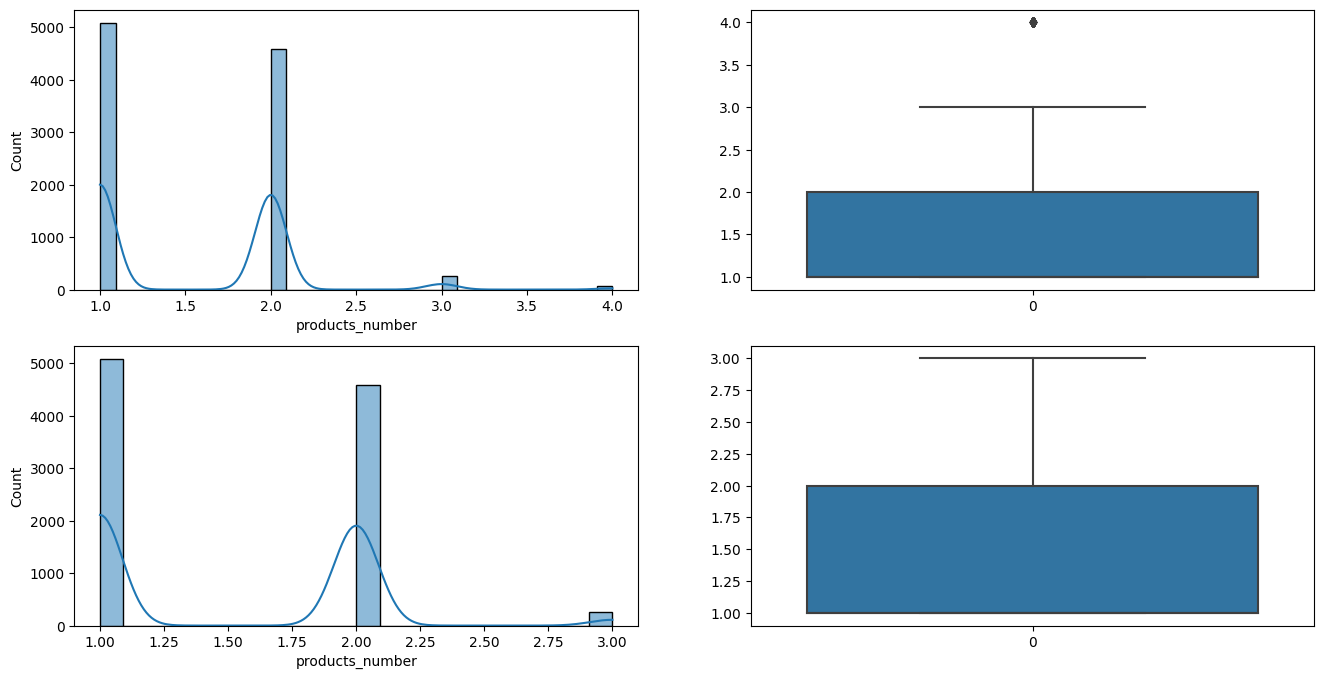

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['products_number'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['products_number'])

plt.subplot(2,2,3)
sns.histplot(new_data['products_number'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data['products_number'])

plt.show()

**Capping**

Capping is a second way to impute the outliers with some other values. There can be mean, median or mode or any constant value also (that we gonna do here) leads to the condition where there will be no outliers in the dataset.

In [ ]:
new_data_cap = data.copy()
new_data_cap['products_number'] = np.where(
    new_data_cap['products_number'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap['products_number'] < lower_limit,
        lower_limit,
        new_data_cap['products_number']
    )
)

In [ ]:
new_data_cap.shape


(10000, 12)

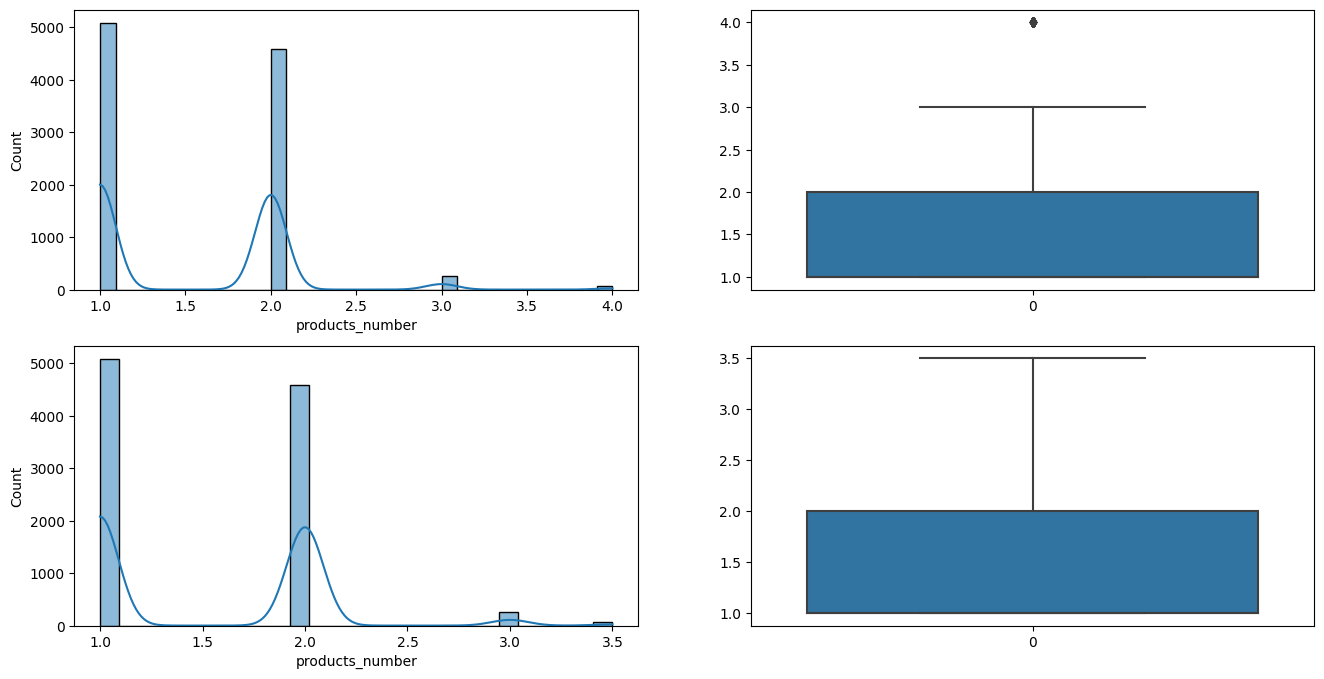

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['products_number'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['products_number'])

plt.subplot(2,2,3)
sns.histplot(new_data_cap['products_number'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data_cap['products_number'])

plt.show()

After capping, one can see from the naked eye that there are no outliers present in the dataset anymore, and histogram plot has a slight peak in the 3-3.5 tile, which stimulates that there are values imputed in that region.

In [ ]:
# Calculate skewness
skewness = data['products_number'].skew()

# Print results with descriptive labels
print(f"Skewness of {'products_number'}: {skewness:.2f}")

Skewness of products_number: 0.75


Value close to 0 suggest an approximately symmetric distribution.Therefore products_number is a symmetrically distributed column.

In [ ]:
# Calculate kurtosis
kurtosis = data['products_number'].kurt()

# Print results with descriptive labels
print(f"Kurtosis of {'products_number'}: {kurtosis:.2f}")

Kurtosis of products_number: 0.58


Value close to 0 suggest a distribution similar to a normal distribution in terms of peakedness.Therfore products_number is in normal distribution.

**Estimated Salary**

In [ ]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

<Axes: >

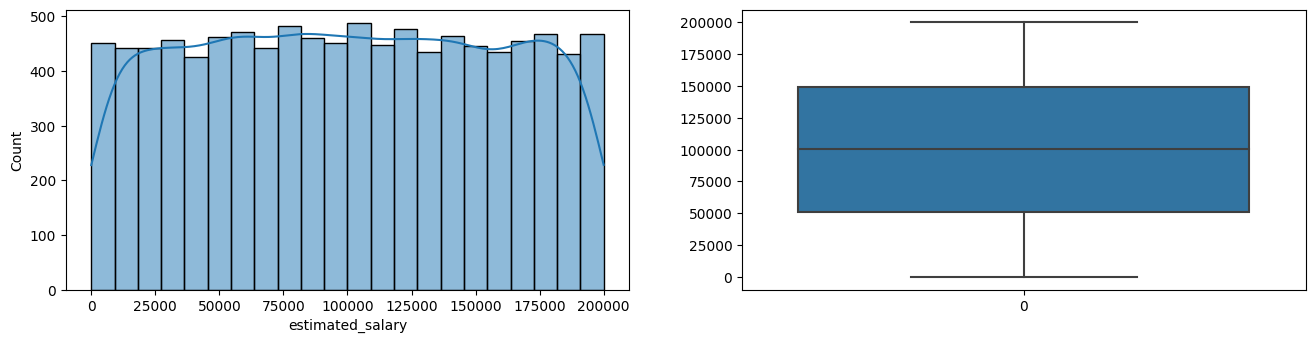

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['estimated_salary'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['estimated_salary'])

From the above we can clearly say that, Estimated salary is a normal distribution so we need not to apply any outlier method.